In [162]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

1.a.	A suitable proximity measure for this dataset would be the Jaccard measure. The reason being is that the measure is used specifically for binary data and even more specifically binary strings which we will result in after using one-hot encoding. The dataset that we have been presented with would be transformed into binary data using dummy variables, then we would be able to calculate the Hamming distance to find their proximity. 

1.b.	The missing values affect the result of clustering by increasing the probability that a point will be placed in the wrong cluster. A way to handle this issue without estimating nor discarding records would be to perform partial data cluster analysis, where you cluster based on data that is common among records. 


2.Give an example of a data set for which K-means is able to find the natural clusters but DBSCAN cannot. Plot the data set, and show the natural clusters, K-means result and DBSCAN result

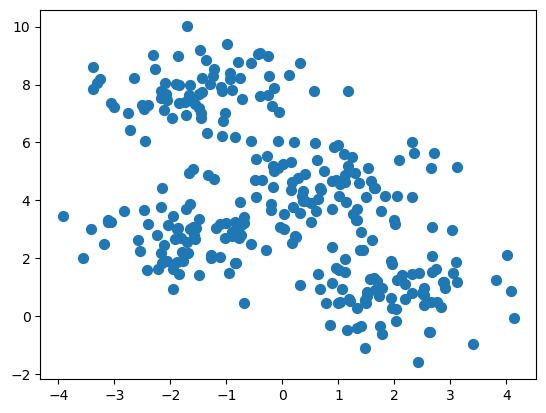

In [117]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.90, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)


array([ 0,  1,  0,  1,  0, -1, -1,  0, -1,  1,  2,  4,  0, -1,  0,  0,  0,
        0,  2,  2,  0,  0,  0,  2,  2,  3,  0,  0, -1,  0,  1,  1,  0, -1,
        1,  1,  1,  4,  2,  0,  0,  2, -1,  0,  2,  2,  1,  2,  1,  0,  2,
        0,  1,  0,  0,  2, -1,  2,  1,  0,  1,  0, -1,  2,  2,  2,  1,  0,
        4,  2,  0,  0,  1,  2,  2,  1,  2,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0, -1,  1,  0,  0, -1,  2,  2,  0,  0,  0, -1, -1,  1, -1,
        1,  0,  0,  0, -1,  0, -1,  0,  2,  2,  0, -1,  0, -1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2, -1,  2,  2, -1,  1,  2,
        2,  1,  0,  1,  4,  2,  0,  3,  5,  2,  1,  0,  1,  1,  1,  0,  0,
        0,  0,  2,  1,  2,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  1,  0,  5,  3,  1,  0,  0,  0,  2,  0,  0,  2,  2,  0,  0,  0,
        0,  0,  1,  0,  2,  0,  0,  2,  2,  2, -1,  2,  1,  0,  2,  0,  2,
        0,  3,  2,  1,  0, -1,  0,  2,  0,  5,  1,  2,  2,  0, -1,  0,  1,
        0,  0,  2,  0,  2

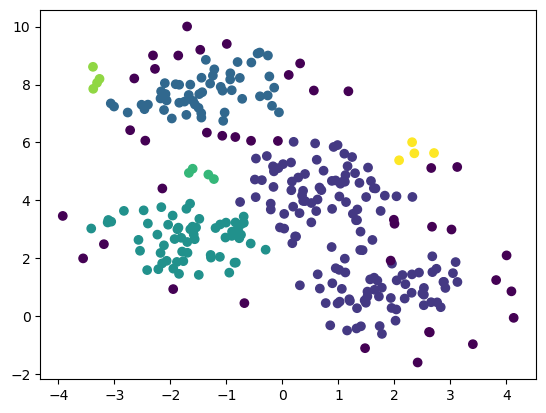

In [33]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN (eps=0.5, min_samples=4).fit(X)
y_cls = clustering.labels_
plt.scatter(X[:,0],X[:,1],c=y_cls)
y_cls

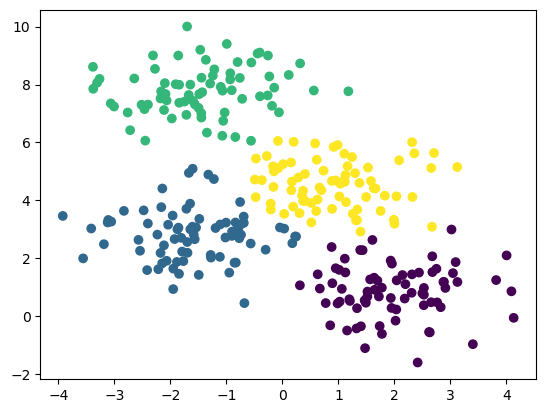

In [35]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

3.a. Apply k-means with k=2 and the initial centroids located at 7.7 and 13.1. Show the cluster assignment and the locations of the centroids at the end of the algorithm. What is the SSE? Solve it manually without using a software

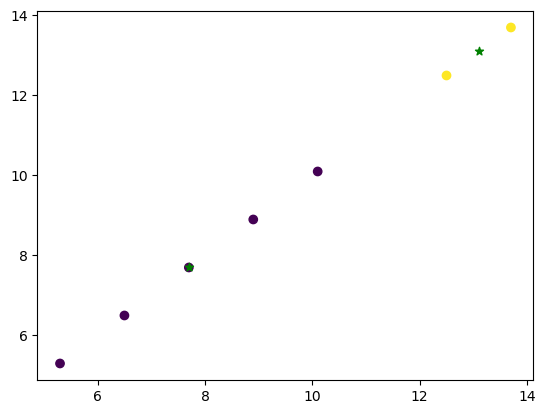

In [65]:
x = np.array([[5.3], [6.5], [7.7], [8.9], [10.1], [12.5], [13.7]])



centroids = np.array([[7.7],[13.1]])


kmeans = KMeans(n_clusters = 2, init = centroids)

y_kmeans = kmeans.fit_predict(x)


plt.scatter(x[:, 0], x[:, 0], c=y_kmeans)
plt.scatter(centroids[:,0] , centroids[:,0] , color = 'green',marker='*')


In [87]:
def get_sse(obs,centroids):
    a = np.subtract(obs,centroids)
    b = np.square(a)
    c = np.sum(b)
    return(c)

print(get_sse(x,centroids[kmeans.labels_]))


15.119999999999997


3.b. Repeat part a) with initial centroids at 7.1 and 12.1

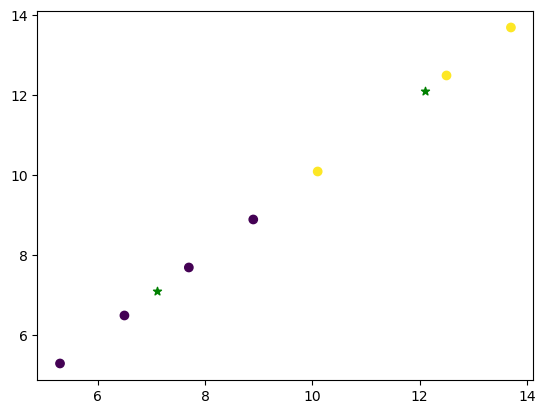

In [91]:
x = np.array([[5.3], [6.5], [7.7], [8.9], [10.1], [12.5], [13.7]])



centroids = np.array([[7.1],[12.1]])


kmeans = KMeans(n_clusters = 2, init = centroids)

y_kmeans = kmeans.fit_predict(x)


plt.scatter(x[:, 0], x[:, 0], c=y_kmeans)
plt.scatter(centroids[:,0] , centroids[:,0] , color = 'green',marker='*')

In [93]:
print(get_sse(x,centroids[kmeans.labels_]))

13.920000000000002


3.c. Which technique produces the most natural clusters? Compare the results obtained in (a) and (b) based on SSE

The second technique produced the best results based on the SSE


4.a. With MinPts = 2 and radius = 4, apply DBScan. List the core points, border points and outliers. How many clusters will be obtained? Plot the result.


[[ 9 16]
 [ 7  0]
 [ 9  6]]


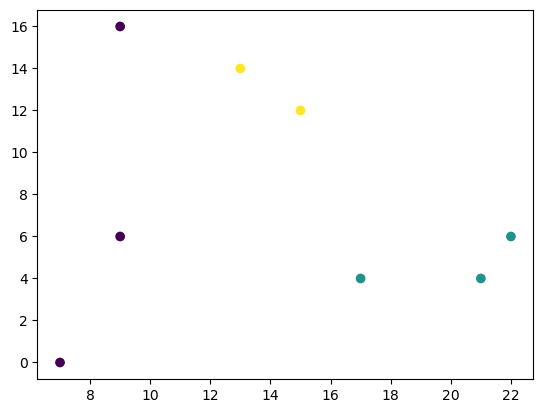

In [163]:
d = np.array([(9, 16), (17, 4), (7, 0), (9, 6), (21, 4), (15, 12), (22, 6), (13, 14)])

clustering = DBSCAN (eps=4, min_samples=2).fit(d)
y_cls = clustering.labels_
plt.scatter(d[:,0],d[:,1],c=y_cls)

print(d[clustering.labels_ == -1]) #Outliers


4.b.  Use complete-link (MAX) to cluster the points. Show the dendrogram of the clustering result. Show your work. Solve it manually without using a software

A little confused here if we were supposed to use Max Proximity Linkage or not?

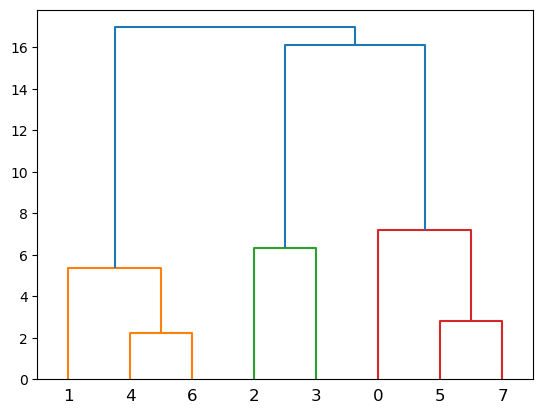

In [166]:
dend = linkage(d, method='complete')

plt.figure()
dendrogram(dend)
plt.show()

5.) The first detail that the manager is missing, is validating that there is clustering in the data. We can use the hopkins test to see if this is true, which will allow us to determine if clustering is even the correct approach. The second detail is what type of analysis will be performed to choose the best K. In this case, silhoutte analysis will allow us to find the best K. A major flaw in the approach is predefining the amount of clusters, rather than finding the best K. This can lead to higher errors in clustering. Another major flaw in this approach is predefining which clutering approach to use without comparing models. Depending on the data, another clustering algorithm may work much better but we will not know until we compare. 

In [120]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
digits.data.shape
tsne = TSNE(n_components=2)
xt = tsne.fit_transform(digits.data)



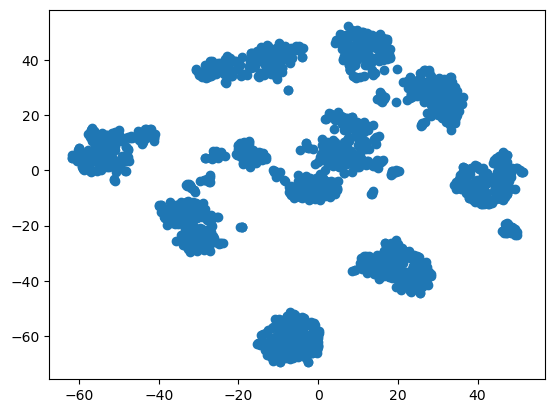

In [121]:
plt.scatter(xt[:,0],xt[:,1])
plt.show()

In [124]:
error = list()
k = list()
for i in range(2,51):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(xt)
    error.append(kmeans.inertia_)
    k.append(i+1)


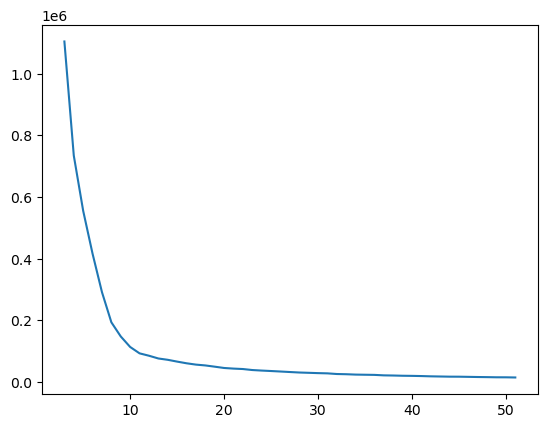

In [126]:
plt.plot(k,error)
plt.show()

6.a. Based on the plot it looks like k=10 would be a good choice for k.

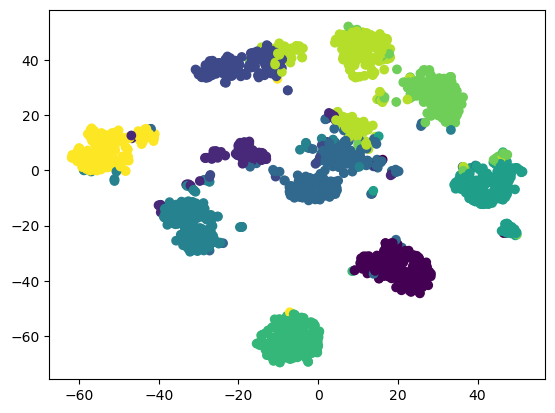

In [130]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)
y_kmeans = kmeans.predict(digits.data)
plt.scatter(xt[:,0],xt[:,1],c=y_kmeans)
plt.show()

In [156]:
from sklearn import metrics
#score = metrics.silhouette_score(digits.data, y_kmeans, metric='euclidean')

sil = list()
k = list()
for i in range(2,51):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(xt)
    y_kmeans = kmeans.predict(xt)
    sil.append(metrics.silhouette_score(xt, y_kmeans, metric='euclidean'))
    k.append(i+1)

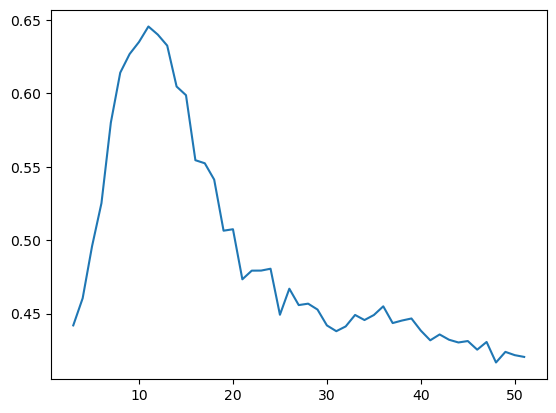

In [159]:
plt.plot(k,sil)
plt.show()

6.d. Based on the results I would deduce that k=11 is the best k.

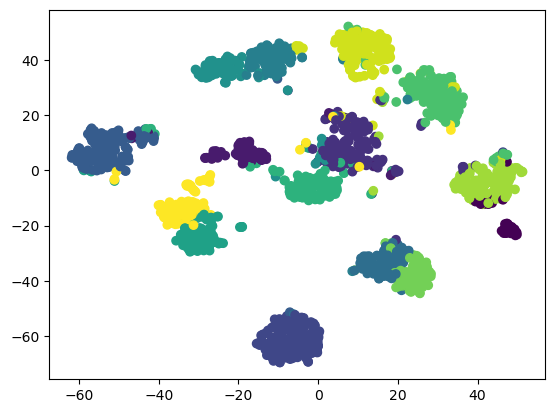

In [158]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(digits.data)
y_kmeans = kmeans.predict(digits.data)
plt.scatter(xt[:,0],xt[:,1],c=y_kmeans)
plt.show()